# Nuclear identification from spatial transcriptomic

the idea here is try to identificate nucleus in muscle section of mouse using gene expression information. The image was obtained using Visium HD tecnology with a maximum resolution of 8un.

In [1]:
#import library
import spatialdata as sd
import spatialdata_plot
import matplotlib.pyplot as plt

/home/stefar/Documents/Spatial Transcriptomic/.venv/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/stefar/Documents/Spatial Transcriptomic/.venv/lib/python3.11/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [2]:
#import the spatial transcriptomic data and create a spatialdata object
data_path = "data/blocco1_sham"
sdata = sd.read_zarr(data_path)
sdata

/tmp/ipykernel_27386/3553350573.py:3: UserWarning: SpatialData is not stored in the most current format. If you want to use Zarr v3, please write the store to a new location using `sdata.write()`.
  sdata = sd.read_zarr(data_path)
/home/stefar/Documents/Spatial Transcriptomic/.venv/lib/python3.11/site-packages/zarr/core/group.py:3535: ZarrUserWarning: Object at zmetadata is not recognized as a component of a Zarr hierarchy.
  warnings.warn(


SpatialData object, with associated Zarr store: /home/stefar/Documents/Spatial Transcriptomic/data/blocco1_sham
├── Images
│     ├── 'blocco1_hires_image': DataArray[cyx] (3, 1849, 4270)
│     ├── 'blocco1_lowres_image': DataArray[cyx] (3, 185, 427)
│     └── 'fluo_image': DataTree[cyx] (3, 7000, 16166), (3, 3500, 8083), (3, 1750, 4041), (3, 875, 2020)
├── Shapes
│     ├── 'GFP_poly': GeoDataFrame shape: (2, 5) (2D shapes)
│     ├── 'blocco1_square_008um': GeoDataFrame shape: (171116, 2) (2D shapes)
│     ├── 'blocco1_square_016um': GeoDataFrame shape: (44363, 1) (2D shapes)
│     ├── 'intissue_008um': GeoDataFrame shape: (95232, 3) (2D shapes)
│     └── 'intissue_poly': GeoDataFrame shape: (1, 5) (2D shapes)
└── Tables
      ├── 'filtered': AnnData (95232, 32285)
      ├── 'final_table': AnnData (95514, 32285)
      ├── 'square_008um': AnnData (95514, 32285)
      └── 'square_016um': AnnData (44363, 32285)
with coordinate systems:
    ▸ 'blocco1', with elements:
        blocco1_hires_

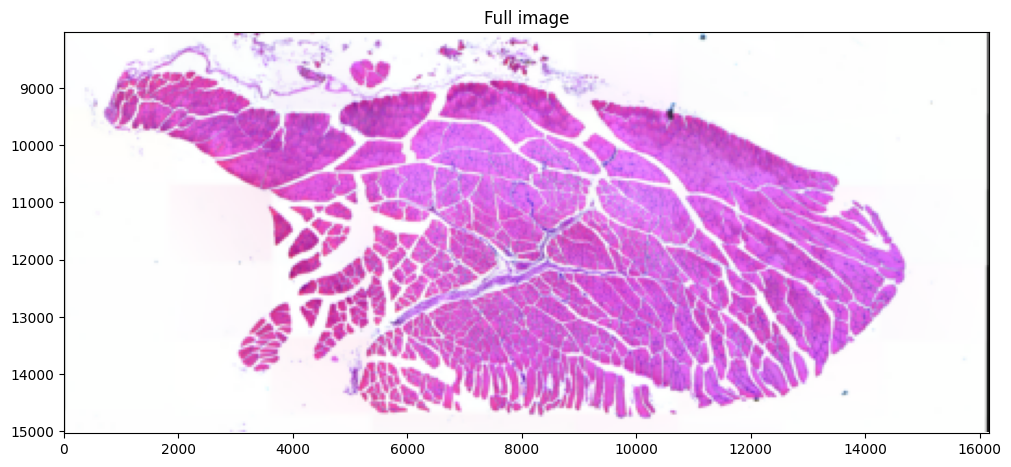

In [4]:
#plot the full image of muscle section
sdata.pl.render_images("blocco1_lowres_image").pl.show(coordinate_systems = "blocco1", title="Full image", figsize=(10,10))


In [5]:

#create a crop of the image in order to either reduce computational demand and also concentrate in a small portion 
#of the image for easier visualization of the bins during the analysis
min_x, min_y = 8000, 13000
max_x, max_y = 9000, 14000

sdata_cropped = sdata.query.bounding_box(
    min_coordinate=[min_x, min_y],
    max_coordinate=[max_x, max_y],
    axes=("x","y"),
    target_coordinate_system='blocco1',
    filter_table=True
)

In [6]:
sdata_cropped

SpatialData object
├── Images
│     ├── 'blocco1_hires_image': DataArray[cyx] (3, 265, 264)
│     ├── 'blocco1_lowres_image': DataArray[cyx] (3, 27, 27)
│     └── 'fluo_image': DataTree[cyx] (3, 1000, 1000), (3, 500, 500), (3, 250, 250), (3, 125, 125)
├── Shapes
│     ├── 'blocco1_square_008um': GeoDataFrame shape: (1640, 2) (2D shapes)
│     ├── 'blocco1_square_016um': GeoDataFrame shape: (436, 1) (2D shapes)
│     ├── 'intissue_008um': GeoDataFrame shape: (1640, 3) (2D shapes)
│     └── 'intissue_poly': GeoDataFrame shape: (1, 5) (2D shapes)
└── Tables
      ├── 'filtered': AnnData (1640, 32285)
      ├── 'final_table': AnnData (1640, 32285)
      ├── 'square_008um': AnnData (1640, 32285)
      └── 'square_016um': AnnData (436, 32285)
with coordinate systems:
    ▸ 'blocco1', with elements:
        blocco1_hires_image (Images), blocco1_lowres_image (Images), fluo_image (Images), blocco1_square_008um (Shapes), blocco1_square_016um (Shapes), intissue_008um (Shapes), intissue_poly (Shap